# Paper Reproduction

---

Author: ZHANG, Yiling  
Date: 27/10   
Paper: [A pan-cancer single-cell transcriptional atlas of tumor infiltrating myeloid cells, Cheng,Sijin et al.,Cell,2021](https://www.cell.com/cell/fulltext/S0092-8674(21)00010-6#secsectitle0075)

---

**Notes**   

This notebook is about the processing procedure for paper reproduction, other report and files please refer to:  

* Report: https://hiiiyilingzhang.gitbook.io/panmyeloid-assignment/
* Data Exploration Notebook: 
* Source Code: [GitHub-hiiiyilingzhang/PanMyeloid-assignment](https://github.com/hiiiyilingzhang/PanMyeloid-assignment)
* TROUBLESHOOTING: 

---

## 1. Environment Setting

In [83]:
import os
print (os.getcwd())

/home/data/vip8t02/Project/PanMyeloid-assignment/report


In [84]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [85]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
%matplotlib inline

sc.settings.verbosity = 3    # errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)
sc.logging.print_versions()

scanpy==1.4.3 anndata==0.7.6 umap==0.3.9 numpy==1.21.2 scipy==1.7.1 pandas==1.3.3 scikit-learn==0.24.2 statsmodels==0.13.0 python-igraph==0.9.7 


* Check data integrity -- if data seems good, it will print its direction.

In [86]:
import os
import gzip

def check_integrity(local_file):
    if local_file.endswith('.gz'):
        with gzip.open(local_file, 'rb') as f:
            try:
                f.seek(-1, os.SEEK_END)
            except:
                return -1
    return 0

# Go through dir and check integrity
# Return data (gunzip doesn;t show invalid compressed data)
for curDir, dirs, files in os.walk("../rawData"):
    for file in files:
        if check_integrity(os.path.join(curDir, file))==0:
            print(os.path.join(curDir, file))

../rawData/MEL-treatment/MEL_patient_cell_id.csv
../rawData/MEL-treatment/scanpy_qc_filtered_MEL.h5ad
../rawData/MEL-treatment/GSE120575_patient_ID_single_cells.txt
../rawData/MEL-treatment/GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.csv
../rawData/MEL-treatment/GSE120575_TPM_original.txt.gz
../rawData/MEL-treatment/GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.txt.gz
../rawData/PAAD/GSE154763_PAAD_normalized_expression.csv.gz
../rawData/PAAD/GSE154763_PAAD_metadata.csv.gz
../rawData/anno.ref/ImmGen.RData
../rawData/anno.ref/hpca-se.RData
../rawData/LYM/GSE154763_LYM_normalized_expression.csv.gz
../rawData/LYM/GSE154763_LYM_metadata.csv.gz
../rawData/MYE/GSE154763_MYE_normalized_expression.csv.gz
../rawData/MYE/GSE154763_MYE_metadata.csv.gz
../rawData/ESCA/GSE154763_ESCA_metadata.csv.gz
../rawData/ESCA/GSE154763_ESCA_normalized_expression.csv.gz
../rawData/UCEC/GSE154763_UCEC_metadata.csv.gz
../rawData/UCEC/GSE154763_UCEC_normalized_expression.csv.gz
../rawData/LUNG/GSM

## 2. Collected Dataset(LUNG) Preprocessing

>For other collected scRNA-seq datasets, we applied the same filtering steps to 10X Genomics datasets (LUNG, KIDNEY, STAD, CRC, HCC, NPC and PAAD). For inDrop datasets, we removed cells with less than 300 total count and cells with more than 20% mitochondrial gene count.

* change  
16,291 immune cells from 48 tumor samples of melanoma patients treated with checkpoint inhibitors
* Libraries were generated with the Smart-Seq2 protocol 
* Illumina NextSeq 500 sequencer with paired-end 38-base reads
* FASTQ files were aligned to the NCBI Human Reference Genome Build GRCh37 (hg19) using STAR

### 2.1 Create Scanpy Object

In [ ]:
LUNG_p1t1 = sc.read_csv("../rawData/LUNG/GSM3635282_human_p1b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p1t1.obs['patient']="LUNG_p1"
LUNG_p1t1.obs['Library']="p1t1"
LUNG_p1b1 = sc.read_csv("../rawData/LUNG/GSM3635282_human_p1b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p1b1.obs['patient']="LUNG_p1"
LUNG_p1b1.obs['Library']="p1b1"
LUNG_p2t1 = sc.read_csv("../rawData/LUNG/GSM3635285_human_p2t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p2t1.obs['patient']="LUNG_p2"
LUNG_p2t1.obs['Library']="p2t1"
LUNG_p2b1 = sc.read_csv("../rawData/LUNG/GSM3635287_human_p2b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p2b1.obs['patient']="LUNG_p2"
LUNG_p2b1.obs['Library']="p2b1"
LUNG_p3t1 = sc.read_csv("../rawData/LUNG/GSM3635288_human_p3t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p3t1.obs['patient']="LUNG_p3"
LUNG_p3t1.obs['Library']="p3t1"
LUNG_p3b1 = sc.read_csv("../rawData/LUNG/GSM3635291_human_p3b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p3b1.obs['patient']="LUNG_p3"
LUNG_p3b1.obs['Library']="p3b1"
LUNG_p4t1 = sc.read_csv("../rawData/LUNG/GSM3635292_human_p4t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p4t1.obs['patient']="LUNG_p4"
LUNG_p4t1.obs['Library']="p4t1"
LUNG_p4b1 = sc.read_csv("../rawData/LUNG/GSM3635295_human_p4b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p4b1.obs['patient']="LUNG_p4"
LUNG_p4b1.obs['Library']="p4b1"
LUNG_p5t1 = sc.read_csv("../rawData/LUNG/GSM3635296_human_p5t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p5t1.obs['patient']="LUNG_p5"
LUNG_p5t1.obs['Library']="p5t1"
LUNG_p6t1 = sc.read_csv("../rawData/LUNG/GSM3635298_human_p6t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p6t1.obs['patient']="LUNG_p6"
LUNG_p6t1.obs['Library']="p6t1"
LUNG_p6b1 = sc.read_csv("../rawData/LUNG/GSM3635300_human_p6b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p6b1.obs['patient']="LUNG_p6"
LUNG_p6b1.obs['Library']="p6b1"
LUNG_p7t1 = sc.read_csv("../rawData/LUNG/GSM3635301_human_p7t1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p7t1.obs['patient']="LUNG_p7"
LUNG_p7t1.obs['Library']="p7t1"
LUNG_p7b1 = sc.read_csv("../rawData/LUNG/GSM3635303_human_p7b1_raw_counts.tsv.gz",delimiter='\t',first_column_names=True)
LUNG_p7b1.obs['patient']="LUNG_p7"
LUNG_p7b1.obs['Library']="p7b1"
# merge into one object.
LUNG = LUNG_p1t1.concatenate(LUNG_p1b1,LUNG_p2t1,LUNG_p2b1,LUNG_p3t1,LUNG_p3b1,LUNG_p4t1,LUNG_p4b1,LUNG_p5t1,LUNG_p6t1,LUNG_p6b1,LUNG_p7t1,LUNG_p7b1)

In [ ]:
LUNG.obs['cancer']="LUNG"
LUNG.obs['tech']="inDrop"

LUNG.write_h5ad("../rawData/LUNG/scanpy_raw_LUNG.h5ad")
LUNG

### 2.2 Computing quality control metrics

First, let Scanpy calculate some general qc-stats for genes and cells with the function `sc.pp.calculate_qc_metrics`, similar to `PercentageFeatureSet` in Seurat. It can also calculate proportion of counts for specific gene populations, so first we need to define which genes are mitochondrial, ribosomal and hemoglogin.

* Labeling spike-ins  
    Because this is Smart-Seq2 data, we may have spike-ins. These gene names start with ERCC. We can label them in LUNG.var as a gene annotation.

In [ ]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in LUNG.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True
        number_of_spike_ins += 1
    else:
        is_spike_in[gene_name] = False
        
LUNG.var['ERCC'] = pd.Series(is_spike_in)
print('Numbers of spike-ins detected: ', number_of_spike_ins)

* Mito Calculation

In [ ]:
# mitochondrial genes
LUNG.var['mt'] = LUNG.var_names.str.startswith('MT-') 

* CD3E+ Myeloid Cluster(both express CD3E and CST3)

In [ ]:
LUNG.var['CST3'] = LUNG.var_names.str.startswith('CST3') 
LUNG.var['CD3E'] = LUNG.var_names.str.startswith('CD3E')

* Heat shock protein assiciated genes(HSP) -- Needs to be regressed out

In [ ]:
LUNG.var['HSP'] = LUNG.var_names.str.startswith('HSP')

In [ ]:
sc.pp.calculate_qc_metrics(LUNG, qc_vars=["mt","ERCC","CD3E","CST3","HSP"], percent_top=None, inplace=True)

# for plotting
qc = sc.pp.calculate_qc_metrics(LUNG, qc_vars = ["mt","ERCC","HSP","CD3E","CST3"])             
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

In [ ]:
LUNG

### 2.3 Plot QC

* Library size  
First, we consider the total number of reads detected per cell. Cells with few reads are likely to have been broken or failed to capture a cell, and should thus be removed.

In [ ]:
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(500, color='red')

* Detected genes   
We also want to make sure that the reads are distributed across the transcriptome.Here I count the total number of unique genes detected in each sample.  
From the plot we conclude that most cells have between 1,000-5,000 detected genes, which is kind of typical for Smart-Seq2 data.

In [ ]:
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(500, color='red')

* Spike-ins  
   Plot the distribution of pct_counts_ERCC in this dataset.  
   Only 11 ERCC gene detected, so...

In [ ]:
plt.hist(cell_qc_dataframe['total_counts_ERCC'], bins=1000)
plt.xlabel(' counts ERCC')
plt.ylabel('N cells')
plt.axvline(20, color='red')

### 2.4 Cell Filtering

Filtering criteria used (Here is the valus mentioned in paper, actually those values are highly dependent on the library preparation method used)
* 500 < Number of Detected Genes < 5,000
* 300 < Total UMI Count < 40.000
* Mitochondrial Percentage < 20%
* ERCC Gene Count < 20%

In [ ]:
print("Before Cell Filtering:",LUNG.n_obs, LUNG.n_vars)
sc.pp.filter_cells(LUNG, max_genes=5000)
sc.pp.filter_cells(LUNG, min_genes=500)
print("After Cell Filtering:",LUNG.n_obs, LUNG.n_vars)

In [ ]:
print("Before Cell Filtering:",LUNG.n_obs, LUNG.n_vars)
sc.pp.filter_cells(LUNG, max_counts=40000)
sc.pp.filter_cells(LUNG, min_counts=300)
print("After Cell Filtering:",LUNG.n_obs, LUNG.n_vars)

In [ ]:
sc.pl.violin(LUNG, ['pct_counts_mt','pct_counts_HSP','total_counts_ERCC'],jitter=0.4, rotation= 45)

As the ribosomal proteins are highly expressed in this data set, they will make up a larger proportion of the transcriptional landscape when fewer of the lowly expressed genes are detected. However, percent.ribo wasn't taken into consideration according to the protocol.

In [ ]:
sc.pl.highest_expr_genes(LUNG, n_top=20)

In [ ]:
# filter for percent mito
LUNG = LUNG[LUNG.obs['pct_counts_mt'] < 20, :]

# filter for ERCC counts
LUNG = LUNG[LUNG.obs['total_counts_ERCC'] < 20, :]

print("Remaining cells %d"%LUNG.n_obs)

### 2.5 Quality Control for Genes

We keep detectable genes if at least two cells contain more than 5 reads from the gene, but the threshold strongly depends on the sequencing depth.  

**ATTENTION:** genes must be filtered after cell filtering since some genes may only be detected in poor quality cells.

In [ ]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)')
plt.axvline(3, color='red')
plt.yscale('log') 

In [ ]:
plt.hist(gene_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)')
plt.yscale('log') 
plt.axvline(10, color='red')

### 2.5 Gene Filtering

Not memtioned in the paper, but we usually exclude genes that expressed in less that two cells.

In [ ]:
print("Before Gene Filtering:",LUNG.n_obs, LUNG.n_vars)
sc.pp.filter_genes(LUNG, min_cells = 2)
print("After Gene Filtering:",LUNG.n_obs, LUNG.n_vars)

### 2.6 Remove the CD3E+ myeloid cluster

>Notably, we removed the CD3E+ myeloid cluster with a large fraction of potential doublets predicted by Scrublet (Wolock et al., 2019), which expressed both myeloid gene signature (CST3) and T cell signature (CD3E).

In [ ]:
sc.pl.violin(LUNG, ['total_counts_CST3','total_counts_CD3E'],jitter=0.4, rotation= 45)

In [ ]:
print("Before CD3E+ Myeloid Cluster Filtering:",LUNG.n_obs, LUNG.n_vars)
LUNG = LUNG[(LUNG.obs['total_counts_CST3']==0)&(LUNG.obs['total_counts_CD3E']==0), :]
print("After CD3E+ Myeloid Cluster Filtering:",LUNG.n_obs, LUNG.n_vars)

### 2.7 Normalization

>After quality control, we applied the library-size correction method to normalize the raw count by using `normalize_total` function in Scanpy. Then the logarithmized normalized count matrix was used for the downstream analysis.

Actually, there are two main approaches to normalize single cell data: 
1. One is a simple linear scaling to adjust counts such that each cell has about the same total library size. Examples include converting to counts per million (CPM) which does a reasonable job of correcting for differences in library size.

2. Another methods are more complex, and generally involve parametric modeling of count data to perform nonlinear normalization. These methods are useful when there are more complex sources of unwanted variation (e.g., for highly heterogeneous populations of cells with different sizes).

We usually just stick to the simple, but still need extract attention for some spectial situations. Here is a review [Cole,Michael B.et al.,
Cell Systems, 2019](https://www.cell.com/cell-systems/fulltext/S2405-4712(19)30080-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2405471219300808%3Fshowall%3Dtrue#secsectitle0020) for the comparison of normalization methods.

In [ ]:
# normalize with counts per million, excluding highly expressed genes from the size factor calculation.
sc.pp.normalize_per_cell(LUNG, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(LUNG)

**CONCERNS**: Downloaded data has already been through **TPM**(Transcripts Per kilobase of exon model per Million mapped reads) normalization. Here we normalized again, by **CPM**(counts per million). Is there something called "over-normalization"?

In [81]:
# organize .obs
LUNG.obs = LUNG.obs.drop(['log1p_total_counts', 'log1p_n_genes_by_counts','total_counts_mt', 'log1p_total_counts_mt', 'log1p_total_counts_ERCC', 'log1p_total_counts_CD3E', 'log1p_total_counts_CST3', 'total_counts_HSP', 'log1p_total_counts_HSP'], axis=1)
LUNG.obs.rename(columns={'pct_counts_HSP':'percent_hsp','pct_counts_mt':'percent_mito'},inplace=True)

# store normalized counts in the raw slot, 
import os
LUNG.write_h5ad("../processedData/scanpy_qc_filtered_LUNG.h5ad")

### 2.8 Cell Annotation

> **RESULTS**: To characterize the subsets of myeloid cells and minimize batch effects among different datasets, we analyzed each dataset independently. We performed unsupervised graph-based clustering on myeloid cells and then identified four common major linages (mast cells, pDCs, cDCs, monocytes, or macrophages) based on canonical cell markers. 

If you pass `n_top_genes`, all cutoffs are ignored.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 1999


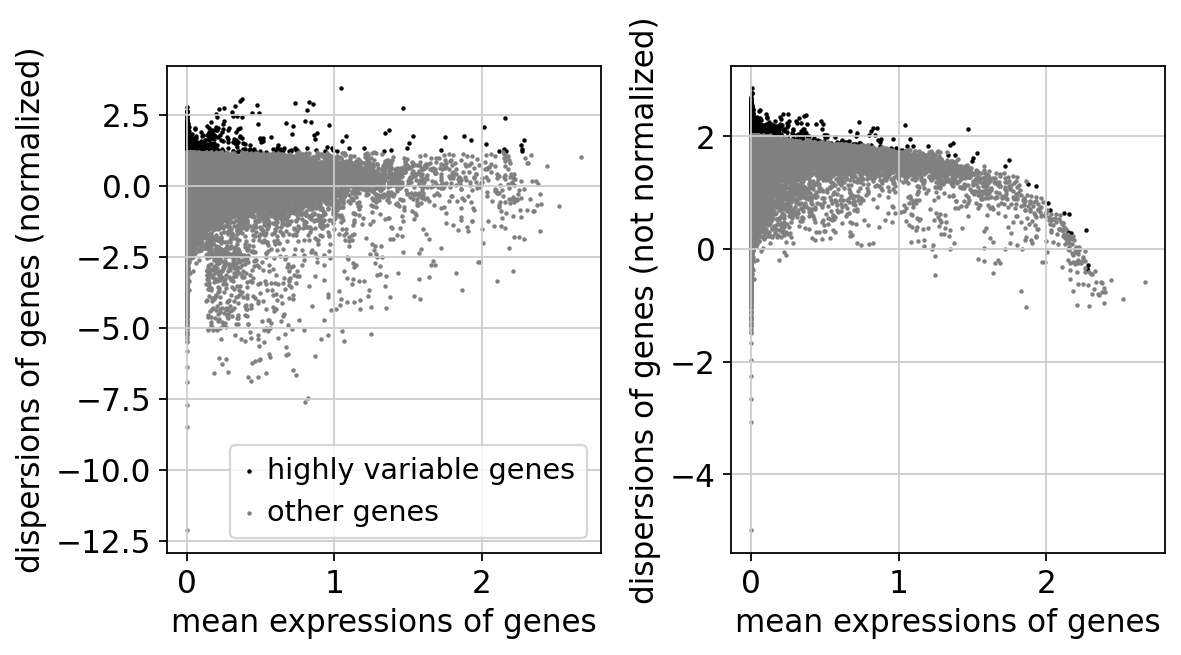

regressing out ['n_counts', 'percent_mito', 'percent_hsp']
    finished (0:02:05.70)
computing PCA with n_comps = 100
computing PCA on highly variable genes
    finished (0:00:00.51)
computing neighbors
    using 'X_pca' with n_pcs = 100


/home/data/vip8t02/anaconda3/envs/scanpy-1.4.3/lib/python3.9/site-packages/scanpy/neighbors/__init__.py:88: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished (0:00:02.63) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 100
    finished (0:00:06.91) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [29]:
# compute variable genes
sc.pp.highly_variable_genes(LUNG, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=2000)
print("Highly variable genes: %d"%sum(LUNG.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(LUNG)

# subset for variable genes in the dataset
LUNG = LUNG[:, LUNG.var['highly_variable']]
sc.pp.regress_out(LUNG, ['n_counts', 'percent_mito','percent_hsp'])
sc.tl.pca(LUNG, svd_solver='arpack', n_comps=100)
sc.pp.neighbors(LUNG, n_pcs=100)
sc.tl.umap(LUNG)

ValueError: The passed `color` CST3 is not a valid observation annotation or variable name. Valid observation annotation keys are: Index(['patient', 'cancer', 'tech', 'n_genes_by_counts', 'total_counts',
       'percent_mito', 'pct_counts_ribo', 'total_counts_ERCC',
       'pct_counts_ERCC', 'total_counts_CD3E', 'pct_counts_CD3E',
       'total_counts_CST3', 'pct_counts_CST3', 'percent_hsp', 'n_genes',
       'n_counts'],
      dtype='object')

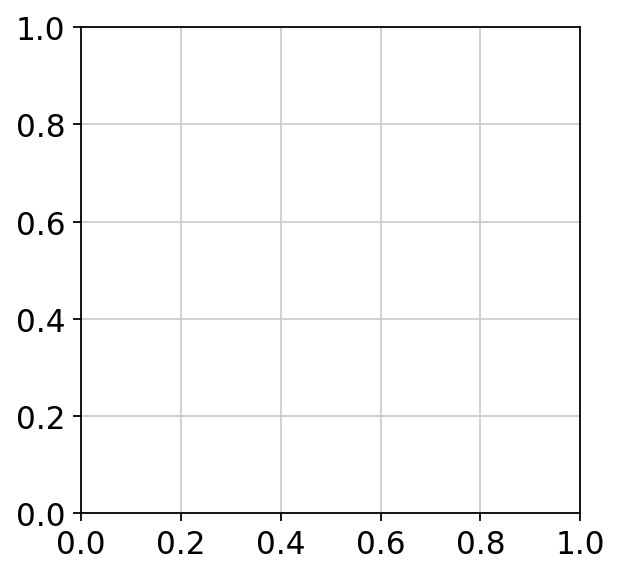

In [35]:
sc.pl.umap(LUNG, color=["CST3"])

In [34]:
LUNG.var

,genes_index,ERCC,mt,ribo,CST3,CD3E,HSP,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
CFTR,CFTR,False,False,False,False,False,False,35,0.006412,0.006391,99.785157,104.449997,4.658237,33,True,0.004513,2.211180,1.547864
CCL3,CCL3,False,False,False,False,False,False,3943,2.210651,1.166474,75.796452,36013.710938,10.491683,3414,True,0.572990,1.994211,1.737384
PGLYRP1,PGLYRP1,False,False,False,False,False,False,32,0.009094,0.009053,99.803573,148.150009,5.004952,29,True,0.003469,2.087442,1.312833
IL32,IL32,False,False,False,False,False,False,11271,7.156613,2.098829,30.814560,116588.390625,11.666413,10601,True,1.503372,1.622246,1.523738
PLAUR,PLAUR,False,False,False,False,False,False,1800,0.960763,0.673334,88.950955,15651.792969,9.658404,1405,True,0.189318,2.005606,1.324416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AP000254.8,AP000254.8,False,False,False,False,False,False,1427,0.683136,0.520659,91.240562,11128.975586,9.317397,1316,True,0.340990,1.935972,1.200909
RP11-386I14.4,RP11-386I14.4,False,False,False,False,False,False,1927,1.048100,0.716913,88.171383,17074.601562,9.745406,1633,True,0.518008,1.993721,1.568822
KB-1440D3.14,KB-1440D3.14,False,False,False,False,False,False,9,0.003726,0.003719,99.944755,60.699997,4.122284,7,True,0.002523,2.220496,1.565560
RP11-434H6.7,RP11-434H6.7,False,False,False,False,False,False,1019,0.489764,0.398617,93.745013,7978.737793,8.984661,914,True,0.354429,1.943466,1.232617


## 3. Create one merged object

* Newly Generated Datasets Processing(**Already weht through QC procedure and normalization**)
    - 10x Chromium Single cell 5' Library
    - Illumina Hiseq X Ten sequencer with 150-bp paired-end reads
    - Aligned and quantified using the Cell Ranger against GRCh38

### 3.1 Create Scanpy Object for newly generated datasets

In [28]:
PAAD = pd.read_csv("../rawData/PAAD/GSE154763_PAAD_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/PAAD/GSE154763_PAAD_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(PAAD.columns,index=PAAD.columns,columns=['genes_index'])

PAAD_ann = sc.AnnData(PAAD, obs=cellinfo, var = geneinfo)
PAAD_ann

AnnData object with n_obs × n_vars = 2853 × 14140
    obs: 'percent_mito', 'n_counts', 'percent_hsp', 'barcode', 'batch', 'library_id', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'source', 'tech', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [29]:
MYE = pd.read_csv("../rawData/MYE/GSE154763_MYE_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/MYE/GSE154763_MYE_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(MYE.columns,index=MYE.columns,columns=['genes_index'])

MYE_ann = sc.AnnData(MYE, obs=cellinfo, var = geneinfo)
MYE_ann

AnnData object with n_obs × n_vars = 7619 × 15634
    obs: 'batch', 'patient', 'tissue', 'percent_hsp', 'percent_mito', 'n_genes', 'n_counts', 'MajorCluster', 'source', 'tech', 'cancer', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [30]:
ESCA = pd.read_csv("../rawData/ESCA/GSE154763_ESCA_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/ESCA/GSE154763_ESCA_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(ESCA.columns,index=ESCA.columns,columns=['genes_index'])

ESCA_ann = sc.AnnData(ESCA, obs=cellinfo, var = geneinfo)
ESCA_ann

AnnData object with n_obs × n_vars = 7673 × 15550
    obs: 'percent_mito', 'n_counts', 'percent_hsp', 'barcode', 'batch', 'library_id', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'source', 'tech', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [31]:
UCEC = pd.read_csv("../rawData/UCEC/GSE154763_UCEC_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/UCEC/GSE154763_UCEC_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(UCEC.columns,index=UCEC.columns,columns=['genes_index'])

UCEC_ann = sc.AnnData(UCEC, obs=cellinfo, var = geneinfo)
UCEC_ann

AnnData object with n_obs × n_vars = 8808 × 15849
    obs: 'percent_mito', 'n_counts', 'percent_hsp', 'barcode', 'batch', 'library_id', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'source', 'tech', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [32]:
OVFTC = pd.read_csv("../rawData/OV-FTC/GSE154763_OV-FTC_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/OV-FTC/GSE154763_OV-FTC_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(OVFTC.columns,index=OVFTC.columns,columns=['genes_index'])

OVFTC_ann = sc.AnnData(OVFTC, obs=cellinfo, var = geneinfo)
OVFTC_ann

AnnData object with n_obs × n_vars = 3888 × 14008
    obs: 'percent_mito', 'n_counts', 'percent_hsp', 'barcode', 'batch', 'library_id', 'cancer', 'patient', 'tissue', 'n_genes', 'MajorCluster', 'source', 'tech', 'UMAP1', 'UMAP2'
    var: 'genes_index'

In [33]:
LYM = pd.read_csv("../rawData/LYM/GSE154763_LYM_normalized_expression.csv.gz", index_col=0)
cellinfo = pd.read_csv("../rawData/LYM/GSE154763_LYM_metadata.csv.gz", index_col=0)
geneinfo = pd.DataFrame(LYM.columns,index=LYM.columns,columns=['genes_index'])

LYM_ann = sc.AnnData(LYM, obs=cellinfo, var = geneinfo)
LYM_ann

AnnData object with n_obs × n_vars = 615 × 11283
    obs: 'batch', 'patient', 'tissue', 'percent_hsp', 'percent_mito', 'n_genes', 'n_counts', 'MajorCluster', 'source', 'tech', 'cancer', 'UMAP1', 'UMAP2'
    var: 'genes_index'

### 3.2 Merge and Examine Data

In [34]:
# merge into one object.
alldata = LYM_ann.concatenate(PAAD_ann,LUNG,OVFTC_ann,UCEC_ann,ESCA_ann,MYE_ann)
print(alldata.obs['cancer'].value_counts())

MEL       10011
UCEC       8808
ESCA       7673
MYE        7619
OV-FTC     3888
PAAD       2853
LYM         615
Name: cancer, dtype: int64


## 4. Batches Removal

### 4.1  Remove Batches from Donors

In [35]:
# Store the full matrix in the raw slot before doing variable gene selection
alldata.raw = alldata

### 4.1 Compute HVG

We need to find genes that are highly variable across cells, which in turn will also provide a good separation of the cell clusters.

> In brief, 2,000 highly-variable genes were selected for downstream analysis by using scanpy.pp.highly_variable_genes function with parameter “n_top_genes=2000.”

If you pass `n_top_genes`, all cutoffs are ignored.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 1999


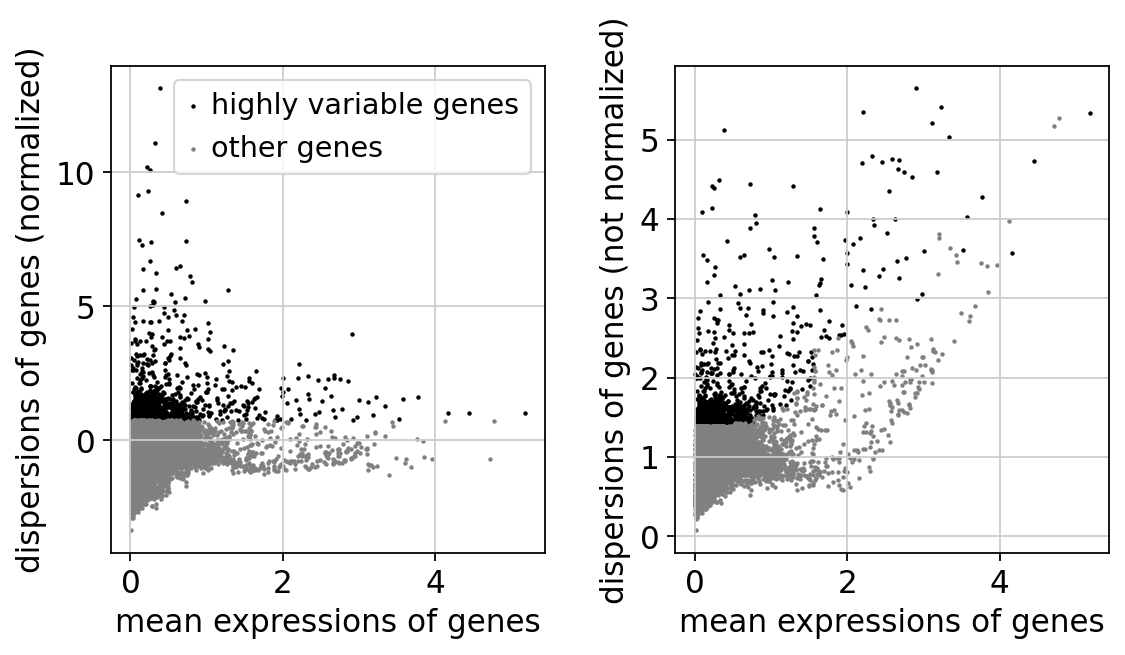

In [36]:
# compute variable genes
sc.pp.highly_variable_genes(alldata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=2000)
print("Highly variable genes: %d"%sum(alldata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(alldata)

# subset for variable genes in the dataset
alldata = alldata[:, alldata.var['highly_variable']]

### 4.2 Regress out covariates

> Then, effects of the total count per cell, the percentage of mitochondrial gene count and the percentage of count for heat shock protein associated genes (HSP) were regressed out by using scanpy.pp.regress_out function.

This is achieved by doing a generalized linear regression using these parameters as covariates in the model. Then the residuals of the model are taken as the "regressed data".

In [37]:
# regress out unwanted variables
sc.pp.regress_out(alldata, ['n_counts', 'percent_mito','percent_hsp'])

regressing out ['n_counts', 'percent_mito', 'percent_hsp']


Trying to set attribute `.obs` of view, copying.
... storing 'patient' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'MajorCluster' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'source' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'tech' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cancer' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'barcode' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'library_id' as categorical


    finished (0:05:30.59)


### 4.3 PCA 

>A principal component analysis (PCA) matrix with 100 components were calculated to reveal the main axes of variation and denoise the data by using scanpy.tl.pca function with parameter “svd_solver='arpack', n_comps=100.. For visualization, the dimensionality of each dataset was further reduced using Uniform Manifold Approximation and Projection (UMAP) implemented in scanpy.tl.umap function with default parameters.

In [38]:
sc.tl.pca(alldata, svd_solver='arpack', n_comps=100)

computing PCA with n_comps = 100
computing PCA on highly variable genes
    finished (0:00:17.83)


### 4.4 Remove Batches from Donors

> To remove the batch effects from different donors, we applied bbknn algorithm with parameter “batch_key='patient', n_pcs=100” to obtain a batch-corrected space.

* Check the batch effect

In [43]:
sc.pp.neighbors(alldata, n_pcs=100)
sc.tl.umap(alldata)

computing neighbors
    using 'X_pca' with n_pcs = 100


/home/data/vip8t02/anaconda3/envs/scanpy-1.4.3/lib/python3.9/site-packages/scanpy/neighbors/__init__.py:88: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished (0:00:15.19) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 100
    finished (0:00:29.52) --> added
    'X_umap', UMAP coordinates (adata.obsm)


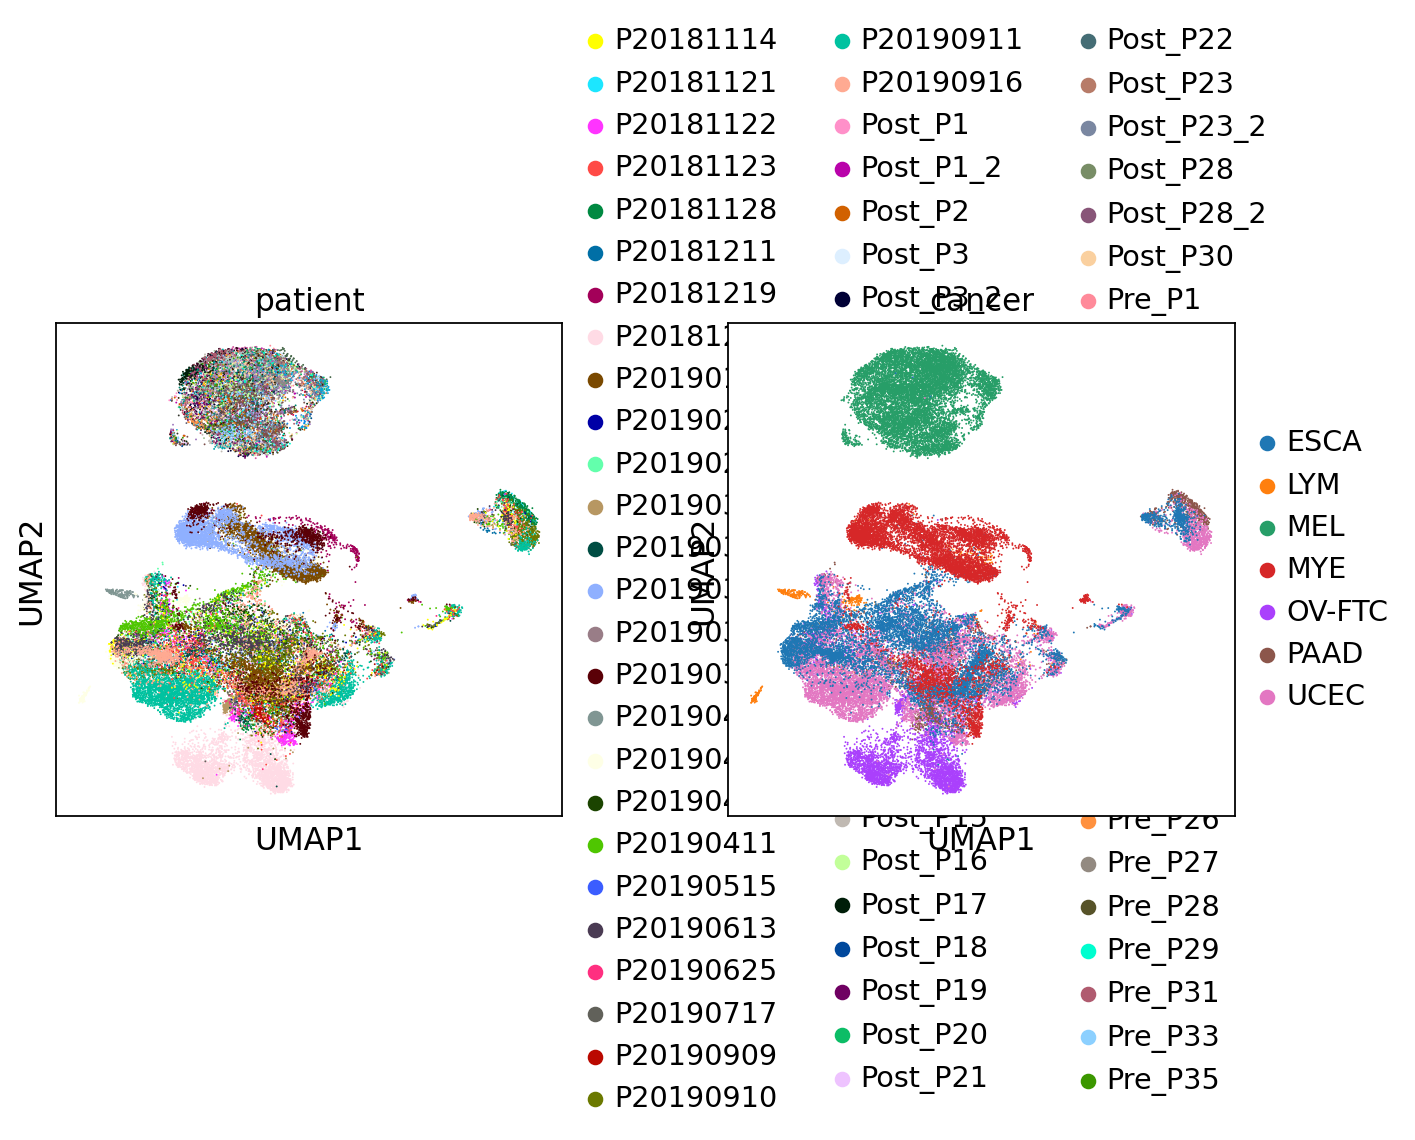

In [45]:
sc.pl.umap(alldata, color=['patient','cancer'])

In [40]:
import bbknn 
bbknn.bbknn(alldata, batch_key='patient',n_pcs=100)

computing batch balanced neighbors
	finished (0:01:24.19) --> added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix


* Check the batch effect after bbknn

In [ ]:
sc.tl.umap(alldata)
sc.pl.umap(alldata, color=['patient','cancer'])

### 4.5 Cluster Cells

> To cluster single cells by their expression profiles, we used an unsupervised graph-based clustering algorithm called Leiden (we used different resolutions range from 0.6 to 1 for different datasets). The cluster-specific marker genes were identified by using the scanpy.tl.rank_genes_groups function with default parameters.


The procedure of graph-based clustering:

1. Build a kNN graph from the data
2. Prune spurious connections from kNN graph (optional step). This is a SNN graph.
3. Find groups of cells that maximizes the connections within the group compared other groups.

In [46]:
sc.tl.leiden(alldata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(alldata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(alldata, resolution = 0.7, key_added = "leiden_0.7")
sc.tl.leiden(alldata, resolution = 0.8, key_added = "leiden_0.8")
sc.tl.leiden(alldata, resolution = 0.9, key_added = "leiden_0.9")

running Leiden clustering
    finished (0:00:05.66) --> found 24 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical)
running Leiden clustering
    finished (0:00:06.83) --> found 19 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical)
running Leiden clustering
    finished (0:00:06.48) --> found 19 clusters and added
    'leiden_0.7', the cluster labels (adata.obs, categorical)
running Leiden clustering
    finished (0:00:07.97) --> found 21 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical)
running Leiden clustering
    finished (0:00:09.14) --> found 22 clusters and added
    'leiden_0.9', the cluster labels (adata.obs, categorical)


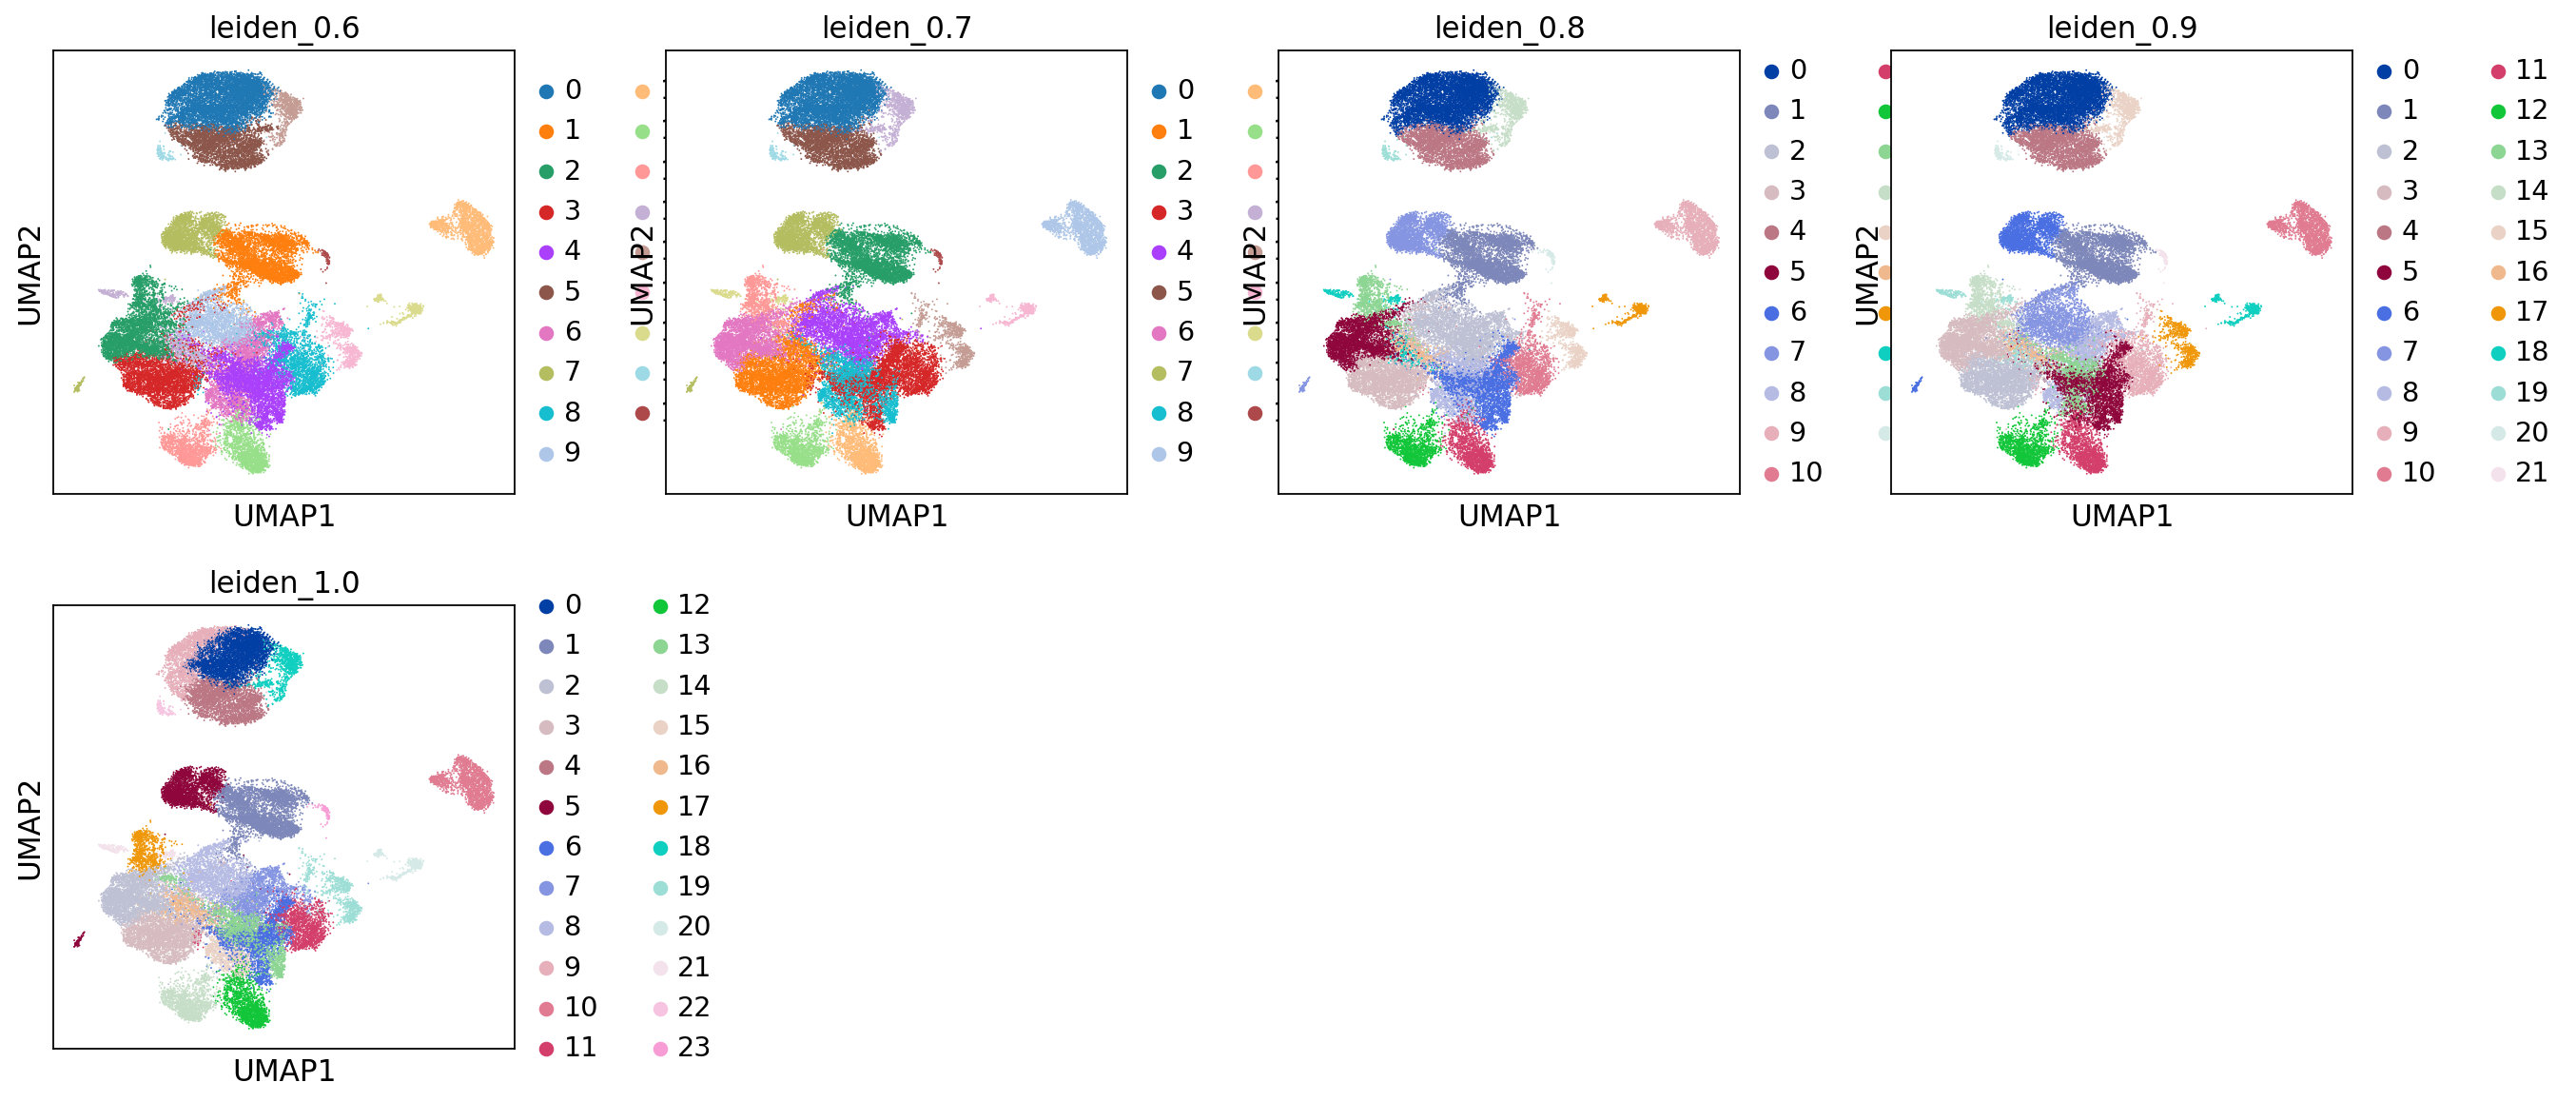

In [48]:
sc.pl.umap(alldata, color=['leiden_0.6', 'leiden_0.7', 'leiden_0.8','leiden_0.9','leiden_1.0'])

Once we have done clustering, the relationships between clusters can be calculated as correlation in PCA space and we also visualize some of the marker genes that we used in the Dim Reduction lab onto the clusters.

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_leiden_0.6']`


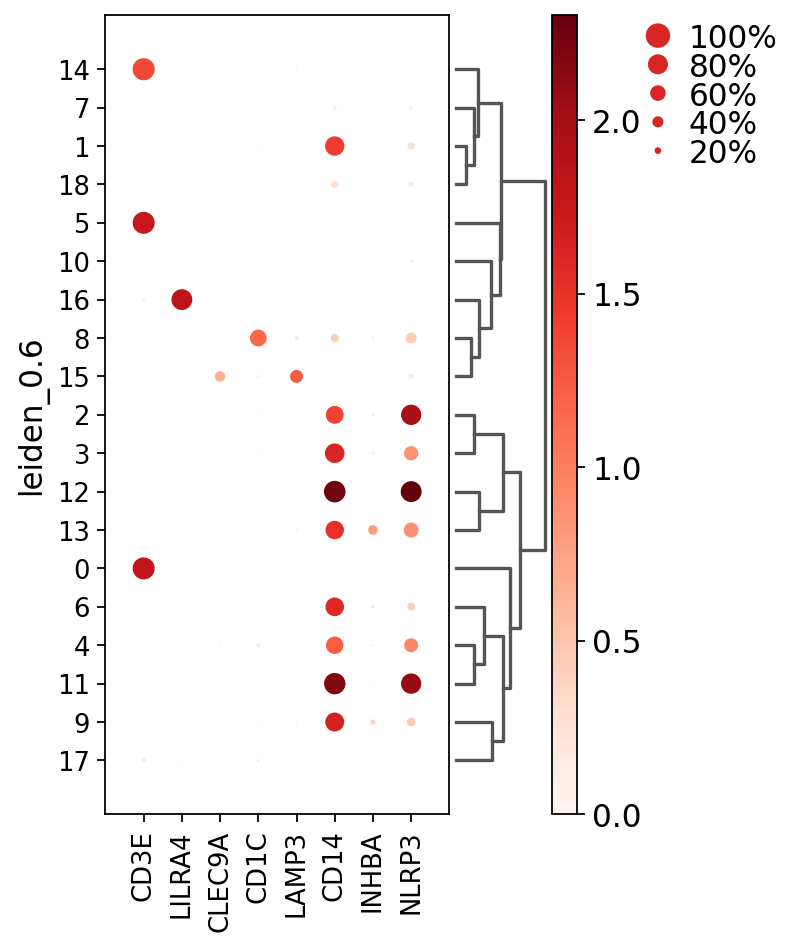

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[2.8, 0.8, 0.2, 0.5, 0.25])

In [52]:
genes  = ['CD3E', 'LILRA4', 'CLEC9A', 'CD1C','LAMP3','CD14','INHBA','NLRP3']
sc.pl.dotplot(alldata, genes, groupby='leiden_0.6', dendrogram=True)

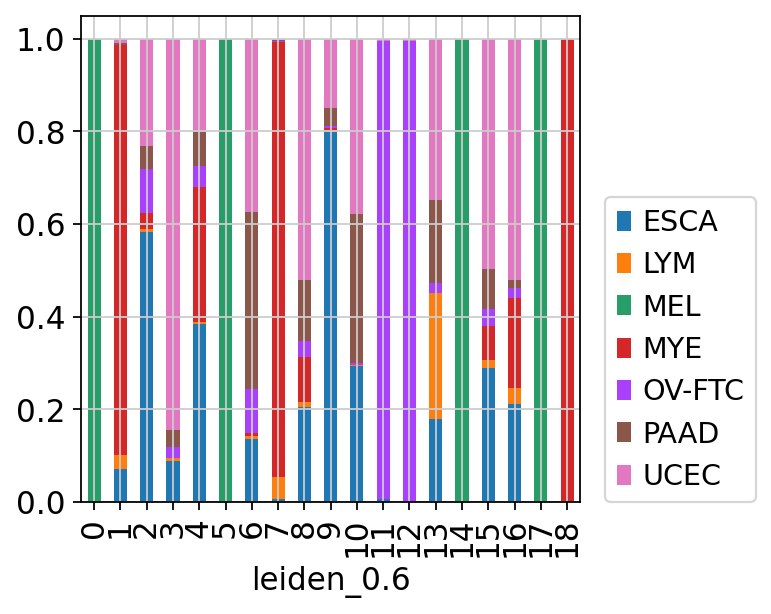

In [54]:
tmp = pd.crosstab(alldata.obs['leiden_0.6'],alldata.obs['cancer'], normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

## 5. Dimensionality Reduction